In [174]:
# Importing essential libraries
import pandas as pd
import numpy as np

In [175]:
# Loading the dataset
df = pd.read_csv('ipl.csv')

In [176]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [177]:
df.shape

(76014, 15)

In [178]:
df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [179]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [180]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [181]:
# Removing unwanted columns
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']

print(f'Before removing unwanted columns: {df.shape}')
df.drop(labels=columns_to_remove, axis=1, inplace=True)
print('After removing unwanted columns: {}'.format(df.shape))

Before removing unwanted columns: (76014, 15)
After removing unwanted columns: (76014, 9)


In [182]:
df.columns

Index(['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [183]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [184]:
df.index

RangeIndex(start=0, stop=76014, step=1)

In [185]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [186]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [187]:
# Keeping only consistent teams
print('Before removing inconsistent teams: {}'.format(df.shape))
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]
print('After removing inconsistent teams: {}'.format(df.shape))

Before removing inconsistent teams: (76014, 9)
After removing inconsistent teams: (53811, 9)


In [188]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [189]:
# Removing the first 5 overs data in every match
print('Before removing first 5 overs data: {}'.format(df.shape))
df = df[df['overs']>=5.0]
print('After removing first 5 overs data: {}'.format(df.shape))

Before removing first 5 overs data: (53811, 9)
After removing first 5 overs data: (40108, 9)


In [190]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
print("Before converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
print("After converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0]))) 

Before converting 'date' column from string to datetime object: <class 'str'>
After converting 'date' column from string to datetime object: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [191]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


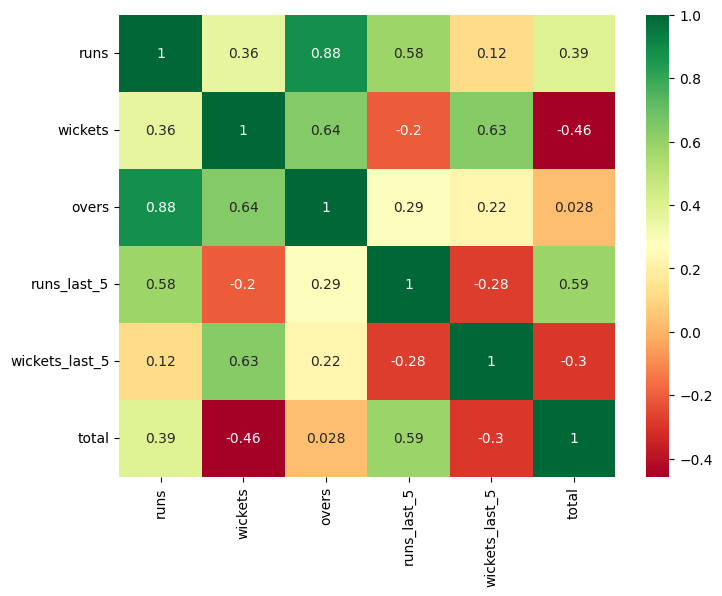

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=['float64','int64'])
# get correlation of all numeric features.
corr_matrix = numeric_df.corr()
# get index
top_corr_features = corr_matrix.index
#ploting
plt.figure(figsize=(8,6))
g = sns.heatmap(data=numeric_df[top_corr_features].corr(), annot = True, cmap='RdYlGn')
plt.show()

In [193]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [194]:
df.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [195]:
# convert categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['bat_team','bowl_team'])
encoded_df

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
33,2008-04-18,61,1,5.2,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34,2008-04-18,61,1,5.3,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
35,2008-04-18,61,1,5.4,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
36,2008-04-18,61,1,5.5,58,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,106,9,18.1,29,4,107,False,False,False,...,False,False,False,False,False,False,True,False,False,False
75885,2017-05-19,107,9,18.2,29,4,107,False,False,False,...,False,False,False,False,False,False,True,False,False,False
75886,2017-05-19,107,9,18.3,28,4,107,False,False,False,...,False,False,False,False,False,False,True,False,False,False
75887,2017-05-19,107,9,18.4,24,4,107,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [196]:
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [197]:
# Rearranging the columns
encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'overs', 'runs', 'wickets' ,'runs_last_5', 'wickets_last_5',
       'total']]

In [198]:
encoded_df

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5,total
32,2008-04-18,False,False,False,True,False,False,False,False,False,...,False,False,True,False,5.1,61,0,59,0,222
33,2008-04-18,False,False,False,True,False,False,False,False,False,...,False,False,True,False,5.2,61,1,59,1,222
34,2008-04-18,False,False,False,True,False,False,False,False,False,...,False,False,True,False,5.3,61,1,59,1,222
35,2008-04-18,False,False,False,True,False,False,False,False,False,...,False,False,True,False,5.4,61,1,59,1,222
36,2008-04-18,False,False,False,True,False,False,False,False,False,...,False,False,True,False,5.5,61,1,58,1,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,False,False,False,True,False,False,False,False,False,...,True,False,False,False,18.1,106,9,29,4,107
75885,2017-05-19,False,False,False,True,False,False,False,False,False,...,True,False,False,False,18.2,107,9,29,4,107
75886,2017-05-19,False,False,False,True,False,False,False,False,False,...,True,False,False,False,18.3,107,9,28,4,107
75887,2017-05-19,False,False,False,True,False,False,False,False,False,...,True,False,False,False,18.4,107,9,24,4,107


In [199]:
# Splitting the data into train and test data set
X_train = encoded_df.drop(labels='total',axis=1)[encoded_df['date'].dt.year<=2016]
X_test = encoded_df.drop(labels='total',axis=1)[encoded_df['date'].dt.year>=2017]

y_train = encoded_df[encoded_df['date'].dt.year<=2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year>=2017]['total'].values

# remove the date column
X_train.drop(labels='date',axis=True,inplace=True)
X_test.drop(labels='date',axis=True,inplace=True)

print("Trainig set: {} and Test set: {}".format(X_train.shape, X_test.shape))

Trainig set: (37330, 21) and Test set: (2778, 21)


In [200]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)

LinearRegression()

In [201]:
print(linear_regressor.coef_)

[-1.31898598e+12 -1.31898598e+12 -1.31898598e+12 -1.31898598e+12
 -1.31898598e+12 -1.31898598e+12 -1.31898598e+12 -1.31898598e+12
 -1.79651006e+10 -1.79651006e+10 -1.79651006e+10 -1.79651006e+10
 -1.79651006e+10 -1.79651006e+10 -1.79651006e+10 -1.79651006e+10
 -6.37272480e+00  9.63867188e-01 -4.88685608e+00 -1.74560547e-02
 -1.15534973e+00]


In [202]:
print(linear_regressor.rank_)

20


In [203]:
print(linear_regressor.intercept_)

1336951079180.4324


In [204]:
# predicting result
y_pred_lr = linear_regressor.predict(X_test)
y_pred_lr

array([171.98266602, 175.13085938, 174.52856445, ..., 100.31054688,
        99.74316406,  93.08081055])

In [205]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
x = [5,1,2,1]
y = [25,5,7,8]

print(mse(x,y))
print(mae(x,y))
print(np.sqrt(mse(x,y)))

122.5
9.0
11.067971810589327


In [228]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
print("----Linear Regression----Model Evaluation----")
print("Mean Absolute error: {}".format(mae(y_test,y_pred_lr)))
print("Mean Squared error: {}".format(mse(y_test,y_pred_lr)))
print("Root Mean Squared error: {}".format(np.sqrt(mse(y_test,y_pred_lr))))

----Linear Regression----Model Evaluation----
Mean Absolute error: 12.123852152374685
Mean Squared error: 251.31186160054716
Root Mean Squared error: 15.852818727297274


In [209]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [210]:
y_pred_dt = decision_regressor.predict(X_test)
y_pred_dt

array([194., 194., 194., ..., 119., 112., 112.])

In [227]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
print("---- Decision Tree ---- Model Evaluation ----")
print("Mean Absolute error: {}".format(mae(y_test,y_pred_dt)))
print("Mean Squared error: {}".format(mse(y_test,y_pred_dt)))
print("Root Mean Squared error: {}".format(np.sqrt(mse(y_test,y_pred_dt))))

---- Decision Tree ---- Model Evaluation ----
Mean Absolute error: 17.55111591072714
Mean Squared error: 559.2883369330453
Root Mean Squared error: 23.649277725398832


In [216]:
# Random Froest Regression Model
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [218]:
# predicting results
y_pred_rf = random_regressor.predict(X_test)
y_pred_rf

array([181.92, 180.3 , 187.1 , ..., 117.61, 115.  , 114.08])

In [226]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
print("---- Random Forest ---- Model Evaluation ----")
print("Mean Absolute error: {}".format(mae(y_test,y_pred_rf)))
print("Mean Squared error: {}".format(mse(y_test,y_pred_rf)))
print("Root Mean Squared error: {}".format(np.sqrt(mse(y_test,y_pred_rf))))

---- Random Forest ---- Model Evaluation ----
Mean Absolute error: 13.821620470362369
Mean Squared error: 336.2431767165427
Root Mean Squared error: 18.336934768835892


In [222]:
# AdaBoost model using Linear Regression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
adb_regressor = AdaBoostRegressor(estimator=linear_regressor, n_estimators=100)
adb_regressor.fit(X_train,y_train)

AdaBoostRegressor(estimator=LinearRegression(), n_estimators=100)

In [223]:
# Predicting results using AdaBoost Regressor
y_pred_adb = adb_regressor.predict(X_test)
y_pred_adb

array([170.18933105, 173.11206055, 172.6583252 , ...,  94.87988281,
        94.53759766,  86.66113281])

In [229]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
print("---- AdaBoost ---- Model Evaluation ----")
print("Mean Absolute error: {}".format(mae(y_test,y_pred_adb)))
print("Mean Squared error: {}".format(mse(y_test,y_pred_adb)))
print("Root Mean Squared error: {}".format(np.sqrt(mse(y_test,y_pred_adb))))

---- AdaBoost ---- Model Evaluation ----
Mean Absolute error: 12.131073085930469
Mean Squared error: 247.74158397210056
Root Mean Squared error: 15.739808892489787


In [231]:
encoded_df.columns

Index(['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'overs', 'runs', 'wickets',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [234]:
df.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [265]:
# predict_score function using the AdaBoost model for predictions
def predict_score(batting_team='Chennai Super Kings',bowling_team='Mumbai Indians',overs=5.1,runs=50,wickets=0,runs_in_prev_5=50,wickets_in_prev_5=0):
    team_array=[]
    # batting team
    teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad']
    for team in teams:
        team_array.append(1 if batting_team == team else 0)
    # bowling team
    for team in teams:
        team_array.append(1 if bowling_team == team else 0)
    # append all the other features
    team_array.extend([overs,runs,wickets,runs_in_prev_5,wickets_in_prev_5])
    # convert to dataframe with feature names
    columns = ['bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'overs', 'runs', 'wickets',
       'runs_last_5', 'wickets_last_5']
    input_df = pd.DataFrame([team_array],columns = columns)
    input_df
    # prediction using adaboost
    predict_score = adb_regressor.predict(input_df)[0]
    return int(predict_score)

In [266]:
mean_error = np.mean(abs(y_train-adb_regressor.predict(X_train)))
mean_error

np.float64(13.402178621534812)

In [268]:
final_score = predict_score(batting_team='Chennai Super Kings',bowling_team='Mumbai Indians',overs=5.1,runs=50,wickets=0,runs_in_prev_5=50,wickets_in_prev_5=0   )
print(final_score)
print(f"final prediction score(range) : {final_score-mean_error:.2f} to {final_score+mean_error:.2f}")

172
final prediction score(range) : 158.60 to 185.40


In [256]:
final_score = predict_score(batting_team='Royal Challengers Bangalore',bowling_team='Mumbai Indians',overs=8.1,runs=50,wickets=4,runs_in_prev_5=20,wickets_in_prev_5=3   )
print(f"final prediction score(range) : {final_score-mean_error:.2f} to {final_score+mean_error:.2f}")

final prediction score(range) : 114.60 to 141.40
